# This lab plays with linear transformation. We will deal with transition matrix, and manipulating images with matrices.

Here we try tiling the plane with a bird image(From _When life is linear_ by Tim Chartier)

In [32]:
# import packages 
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.patches
from PIL import Image


<Figure size 432x288 with 0 Axes>

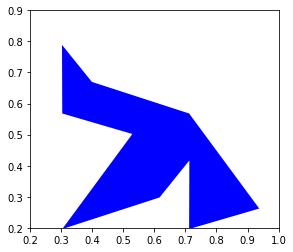

In [33]:
# make a basic bird polygon. Run the code to plot the bird

fig = plt.figure()
points = [[0.3036, 0.1960], [0.6168, 0.2977], [0.7128, 0.4169], [0.7120, 0.1960],[0.9377,0.2620],\
          [0.7120,0.5680],[0.3989,0.6697],[0.3028,0.7889],[0.3036,0.5680],[0.5293,0.5020]]

bird = matplotlib.patches.Polygon(points, facecolor='blue')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(bird)

ax.set_xlim(0.2,1)
ax.set_ylim(0.2,0.9)
plt.show()

## Manipulating the figure (reflection, translation,and rotation) is done thru matrix multiplication.

In [34]:
# rotate bird 180 degrees about the origin, first define rotation matrix  # point (0.7120,0.4320)

theta = np.pi
rotationMatrix = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    
#rotationMatrix

In [35]:
# rotate all points in original bird about the origin 
rotatepoints = []
for x in points:
    rotatepoints.append(np.dot(rotationMatrix,x))

<Figure size 432x288 with 0 Axes>

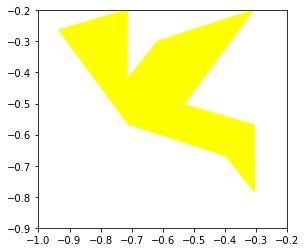

In [36]:
# Plot rotated bird. Run the code to plot the bird

fig = plt.figure()

rotatebird = matplotlib.patches.Polygon(rotatepoints, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(rotatebird)

ax.set_xlim(-1,-0.2)
ax.set_ylim(-0.9,-0.2)
plt.show()

In [37]:
# define shift vector

shift = (2*0.7120, 2*0.4320)


In [38]:
# shift rotated bird up via matrix addition
shiftpoints = []
for x in rotatepoints:
    shiftpoints.append(x+shift)
# shiftpoints    

<Figure size 432x288 with 0 Axes>

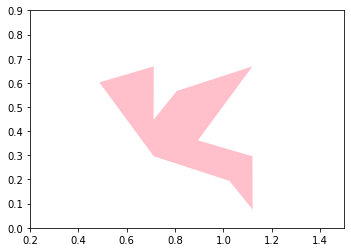

In [39]:
# Plot shifted bird. Run the code to plot the bird

fig = plt.figure()

shiftbird = matplotlib.patches.Polygon(shiftpoints, facecolor='pink')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(shiftbird)

ax.set_xlim(0.2,1.5)
ax.set_ylim(0.0,0.9)
plt.show()


## Now we will achieve the effect of rotating the bird 180 degrees about the point (0.7120, 0.4320)

In general, you can think about the process as translating the point (a,b) to the origin, rotating by $\theta$, then translating from the origin back to (a,b).

This is done via the following matrix multiplication: 
$\begin{pmatrix}1&0&a\\0&1&b\\0&0&1\end{pmatrix}\begin{pmatrix}\cos\theta&-sin\theta&0\\ \sin\theta&\cos\theta&0\\0&0&1\end{pmatrix}\begin{pmatrix}1&0&-a\\0&1&-b\\0&0&1\end{pmatrix}$

Notice, the order of operation is matrix multiplied on the right is the first operation that applies to your vector. Matrix multiplication gives the following product: 

$\begin{pmatrix}\cos\theta&-sin\theta&-a\cos\theta+b\sin\theta+a\\ \sin\theta&\cos\theta&-a\sin\theta-b\cos\theta+b\\0&0&1\end{pmatrix}$

We will then define the array in Numpy and give the point (a,b) and the rotation angle

In [40]:
# Define above array 

theta = np.pi
a = 0.7120
b = 0.4320
shiftrotateMatrix = np.array([[np.cos(theta),-np.sin(theta),-a*np.cos(theta)+b*np.sin(theta)+a],\
                              [np.cos(theta),-np.sin(theta),-a*np.sin(theta)-b*np.cos(theta)+b],\
                              [0,0,1]])
shiftrotateMatrix

array([[-1.0000000e+00, -1.2246468e-16,  1.4240000e+00],
       [-1.0000000e+00, -1.2246468e-16,  8.6400000e-01],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [41]:
# notice the array is 3 by 3, so we will extend the points (x,y) to (x,y,1). Uncomment to see the new list of points3d
points3d = points
for x in points3d:
    x.append(1)
    

print(points3d) 


[[0.3036, 0.196, 1], [0.6168, 0.2977, 1], [0.7128, 0.4169, 1], [0.712, 0.196, 1], [0.9377, 0.262, 1], [0.712, 0.568, 1], [0.3989, 0.6697, 1], [0.3028, 0.7889, 1], [0.3036, 0.568, 1], [0.5293, 0.502, 1]]


In [42]:
# rotate bird about the point (0.7120,0.4320)
pointsab = []
for x in points3d:
    pointsab.append(np.dot(shiftrotateMatrix,x))

pointsab    

[array([1.1204, 0.5604, 1.    ]),
 array([0.8072, 0.2472, 1.    ]),
 array([0.7112, 0.1512, 1.    ]),
 array([0.712, 0.152, 1.   ]),
 array([ 0.4863, -0.0737,  1.    ]),
 array([0.712, 0.152, 1.   ]),
 array([1.0251, 0.4651, 1.    ]),
 array([1.1212, 0.5612, 1.    ]),
 array([1.1204, 0.5604, 1.    ]),
 array([0.8947, 0.3347, 1.    ])]

In [43]:
# convert the list to 2D array. Uncomment to show finalpoints

finalpoints = [[x[0],x[1]] for x in pointsab]

# finalpoints

<Figure size 432x288 with 0 Axes>

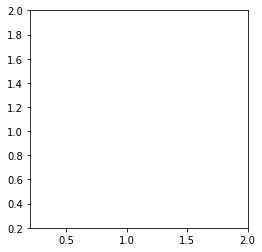

In [44]:
# plot final bird rotated about point (a,b)

fig = plt.figure()

finalbird = matplotlib.patches.Polygon(finalpoints, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(finalbird)

ax.set_xlim(0.2,2)
ax.set_ylim(0.2,2)
plt.show()